# 🧪 LAB 11 – MORPHOLOGICAL OPERATIONS

- The input image is first converted into a grayscale image and then thresholded to obtain a binary image suitable for morphological processing.

- A structuring element (kernel) is defined, which determines the shape and size of the morphological operation.

- Erosion is performed to shrink object boundaries and remove small foreground details.

- Dilation is applied to expand object boundaries and fill small gaps in the objects.

- Opening, which is erosion followed by dilation, is used to remove noise and small objects from the image.

- Closing, which is dilation followed by erosion, is used to fill small holes and connect nearby objects.

- Boundary extraction is achieved by subtracting the eroded image from the original binary image to highlight object boundaries.

- Hole filling is performed using morphological reconstruction by flood-filling the background and inverting the result to fill enclosed regions.

- Noise removal is demonstrated using morphological opening, which effectively eliminates salt-and-pepper noise from the binary image.

- Shape detection is carried out by detecting contours and approximating their shapes based on the number of vertices, enabling identification of basic shapes such as triangles, rectangles, and circles.

- The results of each morphological operation are displayed and compared to analyze their effect on the structure and shape of objects in the image.

# STEP 1: Import Libraries

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 STEP 2: Load Image & Convert to Binary

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

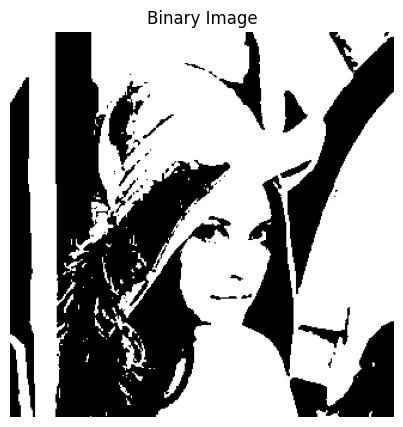

In [2]:
# Load image (grayscale)
img = cv2.imread('/content/Lena.png', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Upload image to Colab")

# Convert to binary image
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

# 🔹 STEP 3: Define Structuring Element

In [3]:
kernel = np.ones((5,5), np.uint8)

# ✅ TASK 1 – Erosion, Dilation, Opening, Closing

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

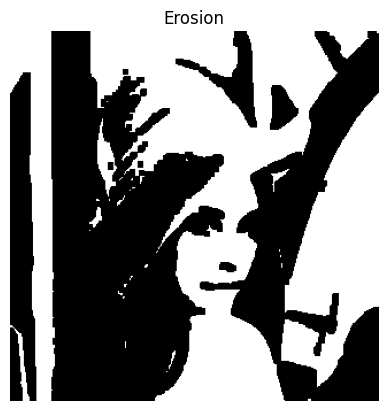

In [4]:
# 🔹 Erosion
erosion = cv2.erode(binary, kernel, iterations=1)

plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis('off')

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

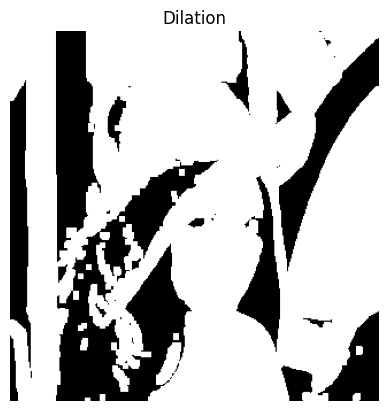

In [5]:
# 🔹 Dilation
dilation = cv2.dilate(binary, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis('off')

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

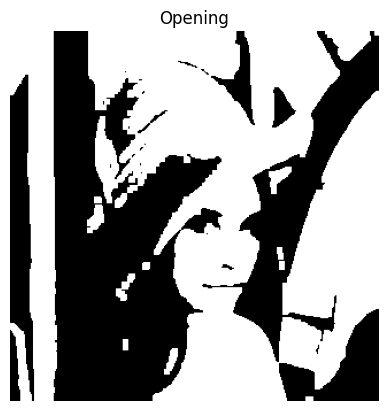

In [6]:
# 🔹 Opening (Erosion → Dilation)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis('off')


(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

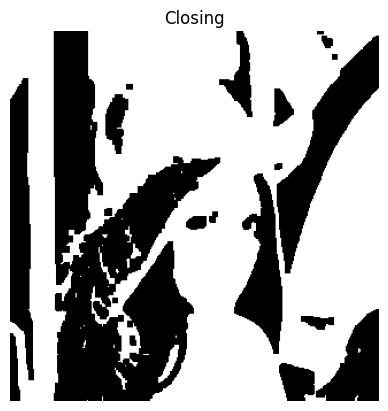

In [7]:
# 🔹 Closing (Dilation → Erosion)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis('off')

# ✅ TASK 2 – Boundary Extraction

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

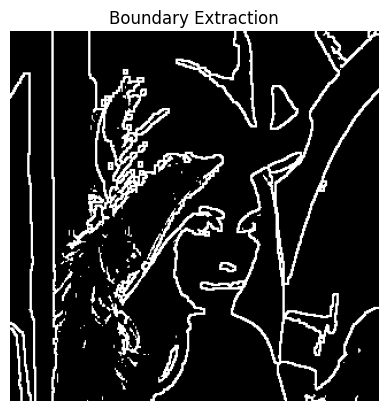

In [8]:
# Formula:

# Boundary = Original − Erosion

boundary = binary - erosion

plt.imshow(boundary, cmap='gray')
plt.title("Boundary Extraction")
plt.axis('off')


# ✅ TASK 3 – Hole Filling (Morphological Reconstruction)

(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

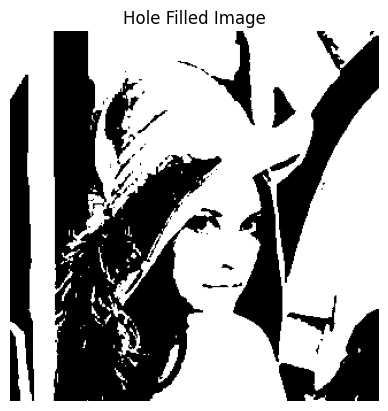

In [9]:
# Invert image
inv = cv2.bitwise_not(binary)

# Flood fill
h, w = inv.shape
mask = np.zeros((h+2, w+2), np.uint8)
floodfilled = inv.copy()
cv2.floodFill(floodfilled, mask, (0,0), 255)

# Invert back
floodfill_inv = cv2.bitwise_not(floodfilled)
filled = binary | floodfill_inv

plt.imshow(filled, cmap='gray')
plt.title("Hole Filled Image")
plt.axis('off')


# ✅ TASK 4 – Noise Removal Using Morphology

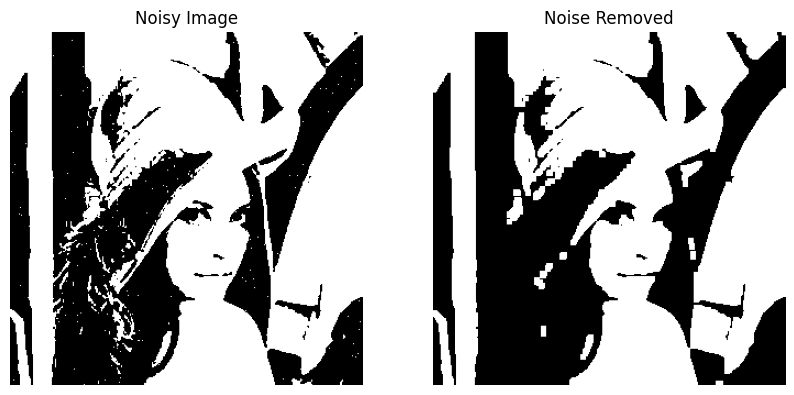

In [10]:
# Add salt noise (for demonstration)
noise = binary.copy()
coords = np.random.randint(0, noise.shape[0], 300), np.random.randint(0, noise.shape[1], 300)
noise[coords] = 255

# Remove noise using opening
denoised = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(noise, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Noise Removed")
plt.axis('off')

plt.show()


# ✅ TASK 5 – Detect Specific Shapes (Using Morphology + Contours)



(np.float64(-0.5), np.float64(320.5), np.float64(321.5), np.float64(-0.5))

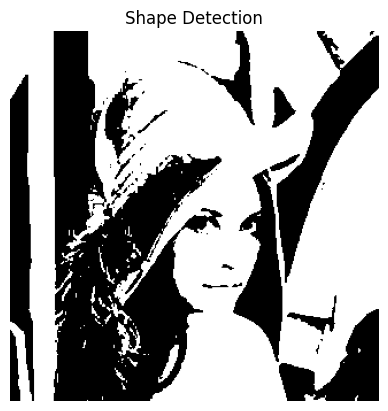

In [11]:
# Edge detection
edges = cv2.Canny(binary, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert to color image
shape_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # filter small objects
        approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)

        if len(approx) == 3:
            label = "Triangle"
        elif len(approx) == 4:
            label = "Rectangle"
        elif len(approx) > 4:
            label = "Circle"
        else:
            label = "Object"

        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(shape_img, (x,y), (x+w,y+h), (255,0,0), 2)
        cv2.putText(shape_img, label, (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

plt.imshow(shape_img, cmap='gray')
plt.title("Shape Detection")
plt.axis('off')
